In [46]:
import datasets
import numpy as np
import pandas as pd
dl_manager = datasets.DownloadManager()
_DOWNLOAD_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00332/OnlineNewsPopularity.zip'
archive = dl_manager.download(_DOWNLOAD_URL)

In [47]:
for path, f in dl_manager.iter_archive(archive):
    if path[-3:] == 'csv':
        df = pd.read_csv(f)

In [48]:
df.columns = df.columns.str.strip()

<AxesSubplot:>

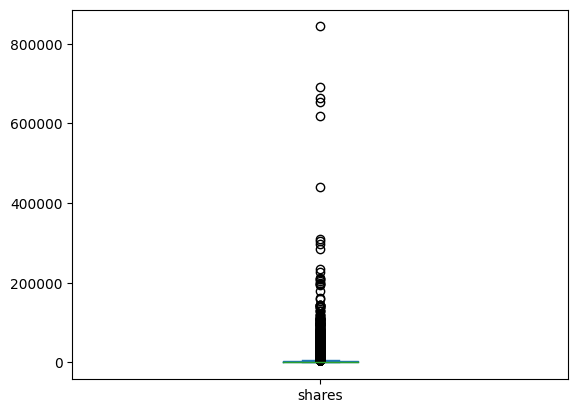

In [49]:
df.shares.plot.box()

In [50]:
# from pandas_profiling import ProfileReport

# profile = ProfileReport(df.iloc[:, 1:], minimal = True)
# profile

# Findings

* n_unique_tokens, n_non_stop_words, n_non_stop_unique_tokens should be between 0 and 1, because they are proportions +

* Check if data_channel_is_* are non-overlaping variables +
    - convert them to a categorical variable

* "num_keywords" indicates how many key words in the article; related variables are kw\_\*\_\* where * $\in$ {min,avg,max} +
    - When they are -1, it needs to be converted to 0
    
* "num_self_hrefs" indicates how many Marshable's own articles are linked in the article; related variables are self_reference_\*\_shares
    
* weekday_is_\* and is_weekend can be treated as a single categorical variable

* By its proximity to LDA_00, ..., LDA_04, it can be treated as a categotical variable

* polarity is between -1 and 1 (negative is between -1 and 0; positive is between 0 and 1)

* subjectivity is between 0 and 1

In [51]:
# n_unique_tokens
df.n_unique_tokens.lt(0).sum(), df.n_unique_tokens.gt(1).sum()

(0, 1)

In [52]:
# n_non_stop_words
df.n_non_stop_words.lt(0).sum(), df.n_non_stop_words.gt(1).sum()

(0, 1)

In [53]:
# n_non_stop_words
df.n_non_stop_unique_tokens.lt(0).sum(), df.n_non_stop_unique_tokens.gt(1).sum()

(0, 1)

In [54]:
df = df.loc[df.n_unique_tokens.le(1),:].reset_index(drop = True)

### Data Channel Variables remain as they are, because they need to be represented as in the design matrix

In [55]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [56]:
# replacing -1 in kw_*_* to 0
df = df.replace({colname: {-1:0} for colname in df.columns[df.columns.str.contains('kw_\w+_\w+')]})

In [57]:
# No Monday, Thursday, or Friday weekend
week = df.loc[:, df.columns.str.contains('week')]
week.T.dot(week)

,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend
weekday_is_monday,6661.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
weekday_is_tuesday,0.0,7389.0,0.0,0.0,0.0,0.0,0.0,0.0
weekday_is_wednesday,0.0,0.0,7435.0,0.0,0.0,0.0,0.0,0.0
weekday_is_thursday,0.0,0.0,0.0,7267.0,0.0,0.0,0.0,0.0
weekday_is_friday,0.0,0.0,0.0,0.0,5701.0,0.0,0.0,0.0
weekday_is_saturday,0.0,0.0,0.0,0.0,0.0,2453.0,0.0,2453.0
weekday_is_sunday,0.0,0.0,0.0,0.0,0.0,0.0,2737.0,2737.0
is_weekend,0.0,0.0,0.0,0.0,0.0,2453.0,2737.0,5190.0


In [58]:
df = df.drop('is_weekend', axis = 1)

In [59]:
# We don't need to transform LDA as it indicates the probability each observation falls into 

In [60]:
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'LDA_00', 'LDA_01',
       'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate

In [61]:
lda = df.loc[:, df.columns.str.contains('LDA_')]
lda.T.dot(lda)

,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04
LDA_00,4092.480323,622.965962,831.402778,792.584111,978.811497
LDA_01,622.965962,2704.643957,641.946437,940.301129,690.086385
LDA_02,831.402778,641.946437,5010.948823,833.921628,1257.608741
LDA_03,792.584111,940.301129,833.921628,5439.482373,864.833437
LDA_04,978.811497,690.086385,1257.608741,864.833437,5486.520317


In [62]:
df = df.drop('n_non_stop_words', axis = 1)

In [63]:
df['shares_class'] = pd.qcut(df.shares, 20, range(20))

In [64]:
df.shares_class

0         1
1         2
2        10
3         7
4         0
         ..
39638    11
39639    12
39640    12
39641     6
39642     8
Name: shares_class, Length: 39643, dtype: category
Categories (20, int64): [0 < 1 < 2 < 3 ... 16 < 17 < 18 < 19]

In [65]:
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'LDA_00', 'LDA_01',
       'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'r

In [66]:
# df = df[['n_tokens_title', 'n_tokens_content',
#        'n_unique_tokens', 'n_non_stop_unique_tokens', 'num_hrefs',
#        'num_imgs', 'num_videos', 'average_token_length',
#        'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max',
#        'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
#        'num_self_hrefs', 'self_reference_min_shares', 'self_reference_max_shares',
#        'self_reference_avg_sharess', 'LDA', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
#        'LDA_04',  'global_subjectivity', 'title_subjectivity', 'abs_title_subjectivity',
#        'global_sentiment_polarity',
#        'global_rate_positive_words', 'global_rate_negative_words',
#        'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
#        'min_positive_polarity', 'max_positive_polarity',
#        'avg_negative_polarity', 'min_negative_polarity',
#        'max_negative_polarity', 'title_sentiment_polarity', 'abs_title_sentiment_polarity',
#        'channel','weekday', 'shares']]

In [67]:
df.drop(['url','timedelta','shares'], axis = 1).to_csv('text_summary_stats.csv', 
                                                             index = False)

In [69]:
left = df.loc[:10,['url','timedelta','shares'] ]

In [72]:
right = df.drop(['url','timedelta','shares'], axis = 1).loc[:10,:]

In [74]:
?pd.concat

In [73]:
pd.concat([left,right], axis = 1)

,url,timedelta,shares,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares_class
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,593,12.0,219.0,0.663594,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,1
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,711,9.0,255.0,0.604743,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,2
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,1500,9.0,211.0,0.575130,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,10
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,1200,9.0,531.0,0.503788,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,7
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,505,13.0,1072.0,0.415646,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,0
5,http://mashable.com/2013/01/07/beewi-smart-toys/,731.0,855,10.0,370.0,0.559889,0.698198,2.0,2.0,0.0,...,0.136364,0.6,-0.195000,-0.400,-0.100000,0.642857,0.214286,0.142857,0.214286,3
6,http://mashable.com/2013/01/07/bodymedia-armba...,731.0,556,8.0,960.0,0.418163,0.549834,21.0,20.0,20.0,...,0.100000,1.0,-0.224479,-0.500,-0.050000,0.000000,0.000000,0.500000,0.000000,0
7,http://mashable.com/2013/01/07/canon-poweshot-n/,731.0,891,12.0,989.0,0.433574,0.572108,20.0,20.0,20.0,...,0.100000,1.0,-0.242778,-0.500,-0.050000,1.000000,0.500000,0.500000,0.500000,4
8,http://mashable.com/2013/01/07/car-of-the-futu...,731.0,3600,11.0,97.0,0.670103,0.836735,2.0,0.0,0.0,...,0.400000,0.8,-0.125000,-0.125,-0.125000,0.125000,0.000000,0.375000,0.000000,16
9,http://mashable.com/2013/01/07/chuck-hagel-web...,731.0,710,10.0,231.0,0.636364,0.797101,4.0,1.0,1.0,...,0.100000,0.5,-0.238095,-0.500,-0.100000,0.000000,0.000000,0.500000,0.000000,2


In [76]:
df = pd.read_csv('text_summary_stats.csv')

In [90]:
df = 

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares_class
0,12.0,219.0,0.663594,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,1
1,9.0,255.0,0.604743,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,2
2,9.0,211.0,0.575130,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,10
3,9.0,531.0,0.503788,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,7
4,13.0,1072.0,0.415646,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39638,11.0,346.0,0.529052,0.684783,9.0,7.0,1.0,1.0,4.523121,8.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,11
39639,12.0,328.0,0.696296,0.885057,9.0,7.0,3.0,48.0,4.405488,7.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,12
39640,10.0,442.0,0.516355,0.644128,24.0,1.0,12.0,1.0,5.076923,8.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,12
39641,6.0,682.0,0.539493,0.692661,10.0,1.0,1.0,0.0,4.975073,5.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,6


In [110]:
sample = pd.read_csv('text_datasets/dataset_223.csv')
sample

,title,content,shares,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares_class
0,Disney to Acquire Top YouTube Network Maker St...,Disney has agreed to purchase top YouTube netw...,912.0,10.0,279.0,0.588889,0.782051,5.0,1.0,1.0,...,0.500000,0.5,-0.309259,-0.875000,-0.100000,0.000000,0.000000,0.500000,0.000000,4
1,Boston Marathon Bombing Double Amputee Expecti...,"Jeff Bauman, a double amputee who lost his leg...",1400.0,11.0,892.0,0.421420,0.532062,5.0,1.0,16.0,...,0.100000,0.5,-0.319643,-1.000000,-0.050000,0.000000,0.000000,0.500000,0.000000,9
2,Egypt Court Sentences 529 Mohamed Morsi Suppor...,An Egyptian judge sentenced to death 529 suppo...,1900.0,9.0,0.0,0.000000,0.000000,0.0,0.0,6.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.500000,12
3,"Exxon Valdez Oil Spill: 25 Years Later, Effect...","Twenty-five years ago today, one of the worst ...",7000.0,10.0,143.0,0.739437,0.865854,6.0,4.0,0.0,...,0.500000,0.5,-0.526531,-0.800000,-0.071429,0.700000,-0.150000,0.200000,0.150000,18
4,More 'Cosmos' Eye Candy: Photos From Episode 3,Cosmos finished its third episode Sunday night...,962.0,10.0,361.0,0.518519,0.680000,4.0,3.0,1.0,...,0.100000,0.6,-0.237500,-0.600000,-0.100000,0.000000,0.000000,0.500000,0.000000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Movie Ticket Discounts? Theater Owners Finally...,If American movie-theater owners have been sup...,664.0,11.0,1785.0,0.474729,0.610553,22.0,7.0,52.0,...,0.062500,1.0,-0.294205,-0.800000,-0.050000,0.200000,-0.150000,0.300000,0.150000,1
97,New Moto 360 Photos Reveal New Straps and Micr...,There's a lot to love about Motorola's Moto 36...,941.0,13.0,357.0,0.525424,0.665072,9.0,7.0,1.0,...,0.136364,0.8,-0.145833,-0.166667,-0.125000,0.000000,0.000000,0.500000,0.000000,4
98,No Fun League? NFL Draws Ire For Banning Celeb...,"The NFL on Tuesday added more fodder for the ""...",761.0,12.0,2689.0,0.338066,0.464623,13.0,3.0,25.0,...,0.100000,1.0,-0.299365,-1.000000,-0.050000,0.833333,-0.388889,0.333333,0.388889,2
99,Obama to Propose Overhaul of NSA's Bulk Phone-...,The Obama administration is set to release a l...,3500.0,13.0,363.0,0.596100,0.752212,1.0,0.0,0.0,...,0.033333,0.7,-0.236607,-0.500000,-0.071429,0.454545,0.136364,0.045455,0.136364,16


In [98]:
summary_df

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares_class
0,12.0,219.0,0.663594,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,1
1,9.0,255.0,0.604743,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,2
2,9.0,211.0,0.575130,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,10
3,9.0,531.0,0.503788,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,7
4,13.0,1072.0,0.415646,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39638,11.0,346.0,0.529052,0.684783,9.0,7.0,1.0,1.0,4.523121,8.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,11
39639,12.0,328.0,0.696296,0.885057,9.0,7.0,3.0,48.0,4.405488,7.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,12
39640,10.0,442.0,0.516355,0.644128,24.0,1.0,12.0,1.0,5.076923,8.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,12
39641,6.0,682.0,0.539493,0.692661,10.0,1.0,1.0,0.0,4.975073,5.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,6


In [101]:
summary_df.loc[:99,:].shape


(100, 57)

In [102]:
sample[summary_df.columns.tolist()] = summary_df.loc[:99,:].to_numpy()

In [105]:
    
dl_manager = datasets.DownloadManager()
_DOWNLOAD_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00332/OnlineNewsPopularity.zip'
archive = dl_manager.download(_DOWNLOAD_URL)

for path, f in dl_manager.iter_archive(archive):
    if path[-3:] == 'csv':
        df = pd.read_csv(f)

df.columns = df.columns.str.strip()
urls = df.url.str.replace('http://', 'https://')
shares = df.shares
N = df.shape[0]
batch_size = 100
# print('start process')
# res = Parallel(n_jobs = -1)(delayed(save_text_csv)(urls[i*batch_size:(i+1)*batch_size], shares[i*batch_size:(i+1)*batch_size], f"dataset_{i}.csv", summary_df.loc[i*batch_size:(i+1)*batch_size,:]) for i in tqdm(range(N//batch_size+1)))


In [106]:
from data_prep import *

In [109]:
i = 0
save_text_csv(urls[i*batch_size:(i+1)*batch_size], 
              shares[i*batch_size:(i+1)*batch_size], 
              f"dataset_{i}.csv", 
              summary_df.loc[i*batch_size:(i+1)*batch_size,:])

In [80]:
sample[df.columns.tolist()] = df

In [81]:
sample

,0,1,2,3,4,5,6,7,8,9,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares_class
0,Disney to Acquire Top YouTube Network Maker St...,Disney has agreed to purchase top YouTube netw...,912.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,1
1,Boston Marathon Bombing Double Amputee Expecti...,"Jeff Bauman, a double amputee who lost his leg...",1400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,2
2,Egypt Court Sentences 529 Mohamed Morsi Suppor...,An Egyptian judge sentenced to death 529 suppo...,1900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,10
3,"Exxon Valdez Oil Spill: 25 Years Later, Effect...","Twenty-five years ago today, one of the worst ...",7000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,7
4,More 'Cosmos' Eye Candy: Photos From Episode 3,Cosmos finished its third episode Sunday night...,962.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,NaN,NaN,NaN,11.0,1785.0,0.474729,0.610553,22.0,7.0,52.0,...,0.100000,0.80,-0.243750,-0.600,-0.125000,0.000000,0.000000,0.500000,0.000000,15
197,NaN,NaN,NaN,13.0,357.0,0.525424,0.665072,9.0,7.0,1.0,...,0.050000,0.60,-0.229101,-0.500,-0.100000,0.000000,0.000000,0.500000,0.000000,14
198,NaN,NaN,NaN,12.0,2689.0,0.338066,0.464623,13.0,3.0,25.0,...,0.100000,0.60,-0.251786,-0.500,-0.100000,0.200000,-0.100000,0.300000,0.100000,9
199,NaN,NaN,NaN,13.0,363.0,0.596100,0.752212,1.0,0.0,0.0,...,0.033333,0.80,-0.227579,-0.600,-0.100000,0.600000,0.500000,0.100000,0.500000,0


In [75]:
pd.read_csv('text_datasets/dataset_223.csv')

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,Disney to Acquire Top YouTube Network Maker St...,Disney has agreed to purchase top YouTube netw...,912.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Boston Marathon Bombing Double Amputee Expecti...,"Jeff Bauman, a double amputee who lost his leg...",1400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Egypt Court Sentences 529 Mohamed Morsi Suppor...,An Egyptian judge sentenced to death 529 suppo...,1900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Exxon Valdez Oil Spill: 25 Years Later, Effect...","Twenty-five years ago today, one of the worst ...",7000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,More 'Cosmos' Eye Candy: Photos From Episode 3,Cosmos finished its third episode Sunday night...,962.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,NaN,NaN,NaN,11.0,1785.0,0.474729,0.610553,22.0,7.0,52.0,...,0.062500,1.0,-0.294205,-0.800000,-0.050000,0.200000,-0.150000,0.300000,0.150000,1.0
197,NaN,NaN,NaN,13.0,357.0,0.525424,0.665072,9.0,7.0,1.0,...,0.136364,0.8,-0.145833,-0.166667,-0.125000,0.000000,0.000000,0.500000,0.000000,4.0
198,NaN,NaN,NaN,12.0,2689.0,0.338066,0.464623,13.0,3.0,25.0,...,0.100000,1.0,-0.299365,-1.000000,-0.050000,0.833333,-0.388889,0.333333,0.388889,2.0
199,NaN,NaN,NaN,13.0,363.0,0.596100,0.752212,1.0,0.0,0.0,...,0.033333,0.7,-0.236607,-0.500000,-0.071429,0.454545,0.136364,0.045455,0.136364,16.0


In [36]:
import os

In [111]:
_FILEPATH = os.path.join(os.getcwd(),'online_news_popularity_data', 'online_news_popularity_data.csv')


In [116]:
df = pd.read_csv(_FILEPATH)

In [128]:
df = df.loc[df.notnull().prod(axis = 1).astype(bool),:].reset_index(drop = True)

In [130]:
from sklearn.model_selection import train_test_split
df_new = train_test_split(df, test_size=0.2, random_state=2023)

In [133]:
df_new.__len__()

2

In [137]:
gen = df.iterrows()

In [1]:
import datasets

In [2]:
datasets.load_dataset('online_news_popularity_data')

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset online_news_popularity_data downloaded and prepared to /home/leepark/.cache/huggingface/datasets/online_news_popularity_data/online_news_popularity_data/1.0.0/ce92457b117b9608606580635166f113f8f0dac75e5763cd3361e96047c97875. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['title', 'content', 'shares', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words